# Random Forest: Avocado Price Prediction

From the original dataset, data cleaning and transformation is carried out, specifically the features "type" and "region" to numerical format with LabelEncoder from scikit-learn.

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
import math 
from sklearn import metrics
import matplotlib.pylab as plt

In [27]:
data = pd.read_csv('C:/data.csv', index_col = 0)
data.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Small Hass    18249 non-null  float64
 4   Large Hass    18249 non-null  float64
 5   XLarge Hass   18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int64  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.9+ MB


In [28]:
x = data.drop(['AveragePrice', 'Date'], axis = 1)
y = data['AveragePrice']

In [29]:
x.head()

,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [30]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, random_state=0, test_size=0.20)


In [88]:
forest_model = RandomForestRegressor(
    n_estimators=100,
    random_state=1)
   
forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [85]:
# predict xtrain
trainPredict = forest_model.predict(x_train)

# predict xtest  
testPredict = forest_model.predict(x_test)

In [89]:
# R Squared 
testRsquared = metrics.r2_score(y_test, testPredict)
print(f'R-Squared : {testRsquared}')

# Mean Absolute Error
testMAE = metrics.mean_absolute_error(y_test, testPredict)
print(f'MAE : {testMAE}')

#  Mean Squared Error
testMSE = metrics.mean_squared_error(y_test, testPredict)
print(f'MSE : {testMSE}')

#  Root Mean Squared Error
testRMSE = math.sqrt(metrics.mean_squared_error(y_test, testPredict))
print(f'RMSE : {testRMSE}')

# Median
testM = metrics.median_absolute_error(y_test, testPredict)
print(f'Median : {testM}')

R-Squared : 0.8352394594936148
MAE : 0.11304696158542311
MSE : 0.02648544524950019
RMSE : 0.1627434952601799
Median : 0.07771428571428429


In [90]:
# R Squared 
trainRsquared = metrics.r2_score(y_train, trainPredict)
print(f'R-Squared : {trainRsquared}')

# Mean Absolute Error
trainMAE = metrics.mean_absolute_error(y_train, trainPredict)
print(f'MAE : {trainMAE}')

#  Mean Squared Error
trainMSE = metrics.mean_squared_error(y_train, trainPredict)
print(f'MSE : {trainMSE}')

#  Root Mean Squared Error
trainRMSE = math.sqrt(metrics.mean_squared_error(y_train, trainPredict))
print(f'RMSE : {trainRMSE}')

# Median
trainM = metrics.median_absolute_error(y_train, trainPredict)
print(f'Median : {trainM}')

R-Squared : 0.9779927643955487
MAE : 0.04133817665601971
MSE : 0.0035771067648453507
RMSE : 0.059808918773418325
Median : 0.027714285714285136


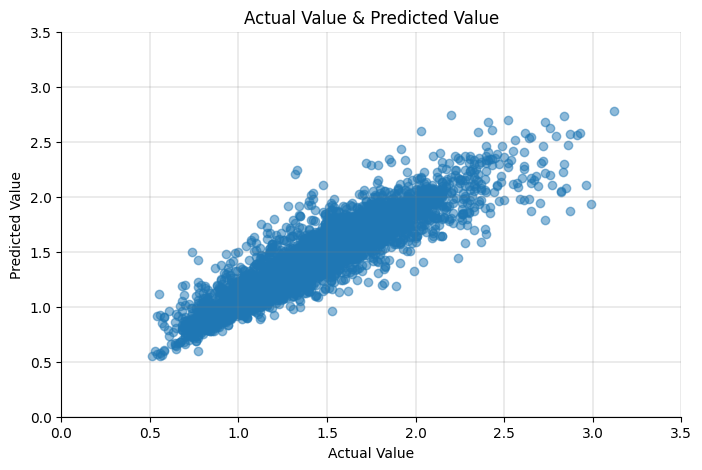

In [100]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(y_test, testPredict, alpha = 0.50)
plt.title('Actual Value & Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.9)
plt.show()

The model presents an accuracy of 84% on the test data, as well as good results for precision measurements.